<a href="https://colab.research.google.com/github/PAastha/TIMESERIESANALYSIS/blob/main/Time_series_day_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime

In [2]:
ticker='TSLA'
tesla_data=yf.download(ticker)
tesla_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2023-07-20,279.559998,280.929993,261.200012,262.899994,262.899994,175158300
2023-07-21,268.000000,268.000000,255.800003,260.019989,260.019989,161050100
2023-07-24,255.850006,269.850006,254.119995,269.059998,269.059998,136508500


In [3]:
tesla_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


**SIMPLE MOVING AVERAGE**
A Simple Moving Average (SMA) is a commonly used method for smoothing out time series data by calculating the average of a fixed window of data points over time. It helps to reduce noise and highlight underlying trends or patterns in the data.


In [4]:
tesla_data['Open:10 days rolling']=tesla_data['Open'].rolling(window=3,min_periods=1).mean()

<Axes: xlabel='Date'>

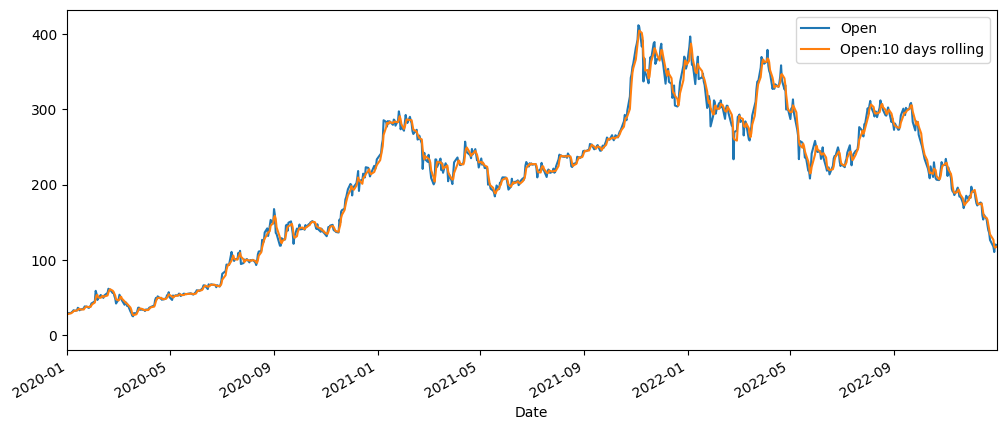

In [5]:
tesla_data[['Open','Open:10 days rolling']].plot(xlim=['2020-01-01','2022-12-31'],figsize=(12,5))

Short term investment understand (for stock market) by understanding in various rolling window period

**CUMULATIVE MOVING AVERAGE**
The Cumulative Moving Average (CMA) is another method for smoothing time series data, similar to the Simple Moving Average (SMA). However, unlike SMA, which considers only a fixed window of data points, CMA includes all the data points up to the current time point in the calculation.

<Axes: xlabel='Date'>

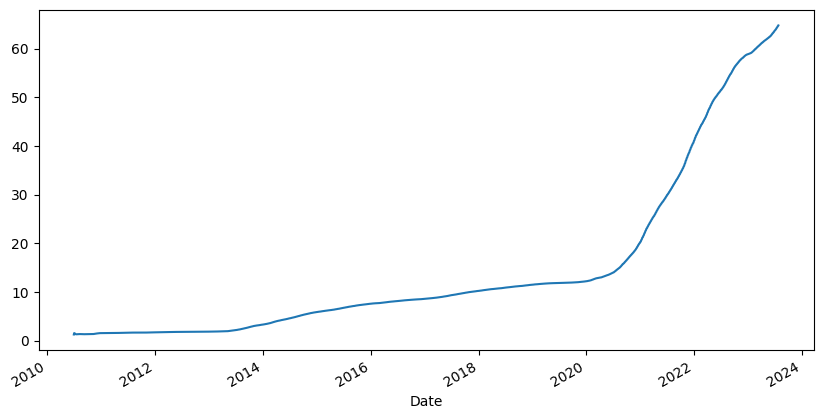

In [6]:
##use expanding

tesla_data['Open'].expanding().mean().plot(figsize=(10,5))


**EXPONENTIAL MOVING AVERAGE**


In [8]:
##smootheining factor is alpha
tesla_data['EMA_0.1']=tesla_data['Open'].ewm(alpha=0.1,adjust=False).mean()

<Axes: xlabel='Date'>

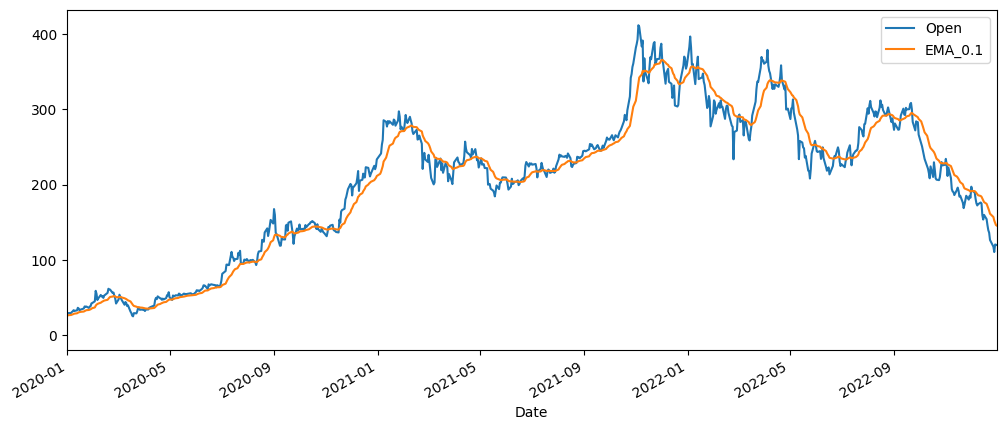

In [9]:
tesla_data[['Open','EMA_0.1']].plot(xlim=['2020-01-01','2022-12-31'],figsize=(12,5))

**EXPONENTIAL WEIGHT MOVING AVERAGE**

In [10]:
##smootheining factor is alpha
tesla_data['EMA_5days']=tesla_data['Open'].ewm(span=5).mean()

<Axes: xlabel='Date'>

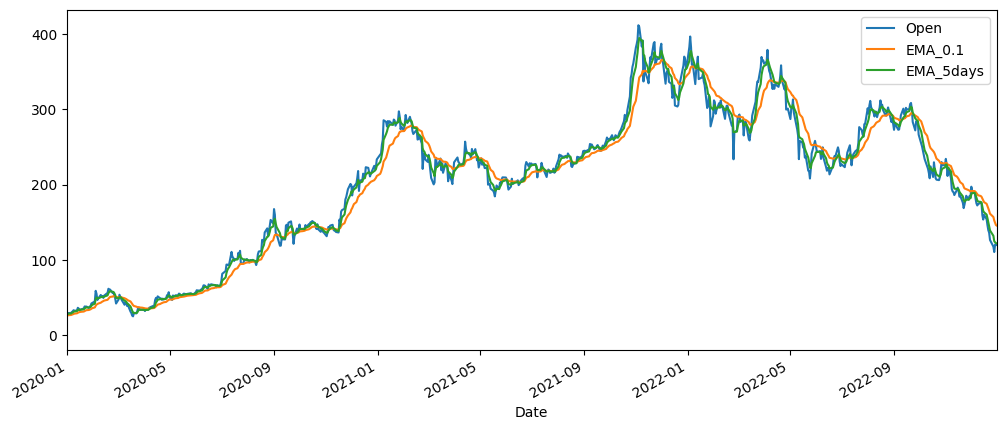

In [11]:
tesla_data[['Open','EMA_0.1','EMA_5days']].plot(xlim=['2020-01-01','2022-12-31'],figsize=(12,5))

**ARIMA**

AutoRegressive (AR) Component: This component involves using lagged values of the time series data to predict future values. It assumes that the future value of the series is a linear combination of its past values. The "p" in ARIMA represents the order of the AR component, indicating how many past observations are considered in the prediction.

Integrated (I) Component: This component involves differencing the time series data to make it stationary. Stationarity is an essential assumption for many time series models, including ARIMA. Differencing helps in removing trends or seasonal patterns that might affect the series. The "d" in ARIMA represents the order of differencing.

Moving Average (MA) Component: This component involves using the past forecast errors to predict future values. It helps capture the short-term shocks and noise in the series. The "q" in ARIMA represents the order of the MA component, indicating how many past forecast errors are considered in the prediction


PACF
ACF

PACF and ACF are two important tools used in time series analysis to identify the presence of autoregressive and moving average components in a time series data. They stand for Partial Autocorrelation Function and Autocorrelation Function, respectively.

Autocorrelation Function (ACF):

The ACF measures the correlation between a time series and its lagged values.
In the context of identifying the Moving Average (MA) component, the ACF is used to determine the order of the MA component (q) in the ARIMA model.
A significant spike in the ACF at lag q indicates that the time series data has a significant correlation with its values at that particular lag. This suggests the presence of a Moving Average relationship with the order q.

Partial Autocorrelation Function (PACF):

The PACF measures the correlation between a time series and its lagged values after removing the effects of intermediate lags.
In the context of identifying the Autoregressive (AR) component, the PACF is used to determine the order of the AR component (p) in the ARIMA model.
A significant spike in the PACF at lag p indicates that the time series data has a significant correlation with its values at that particular lag, after removing the effects of lags in between. This suggests the presence of an Autoregressive relationship with the order p.


By analyzing the ACF and PACF plots, you can identify the appropriate orders of the AR and MA components in the ARIMA model and thus determine the complete ARIMA(p, d, q) model that best fits the time series data